## Машинное обучение: регрессия

Регрессия - это класс алгоритмов машинного обучения, в которых нам необходимо научиться предсказывать значение некоторой численной величины.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.linear_model
import sklearn.compose
import sklearn.tree

В качестве пример рассмотрим датасет стоимости железнодорожных билетов между некоторыми европейскими городами:

In [3]:
df = pd.read_csv("renfe-rail-sample.zip",compression='zip')
df

,Unnamed: 0,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,departure_hour,geodistance
0,37402744,37402745,renfe,MADRID,BARCELONA,2020-09-28,2020-09-28,2.83,AVE,Turista,108.90,Flexible,232.0,18,506.741151
1,37402745,37402746,renfe,MADRID,BARCELONA,2020-09-28,2020-09-28,2.50,AVE,Turista Plus,115.65,Promo +,40.0,19,506.741151
2,37402746,37402747,renfe,MADRID,BARCELONA,2020-09-28,2020-09-28,3.17,AVE,Turista,108.90,Flexible,177.0,20,506.741151
3,37402747,37402748,renfe,MADRID,BARCELONA,2020-10-10,2020-10-10,3.17,AVE,Turista,108.90,Flexible,279.0,7,506.741151
4,37402748,37402749,renfe,MADRID,BARCELONA,2020-10-10,2020-10-10,3.07,AVE,Turista,108.90,Flexible,238.0,9,506.741151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246671,38753055,38753056,renfe,ZARAGOZA,BARCELONA,2020-10-08,2020-10-08,1.85,AVE,Turista Plus,54.75,Promo +,15.0,18,256.506445
1246672,38753056,38753057,renfe,ZARAGOZA,BARCELONA,2020-10-08,2020-10-08,1.80,AVE,Turista,60.90,Flexible,215.0,18,256.506445
1246673,38753057,38753058,renfe,ZARAGOZA,BARCELONA,2020-10-08,2020-10-08,2.12,ALVIA,Turista,53.60,Flexible,20.0,19,256.506445
1246674,38753058,38753059,renfe,ZARAGOZA,BARCELONA,2020-10-08,2020-10-08,1.57,AVE,Turista,60.90,Flexible,29.0,19,256.506445


Разобьем весь датасет на обучающую и тестовую выборку:

In [4]:
df_train, df_test = sk.model_selection.train_test_split(df,train_size=0.8)

Попробуем использовать один параметр для прогнозирования - расстояние между городами. Для начала, изобразим это на графике:

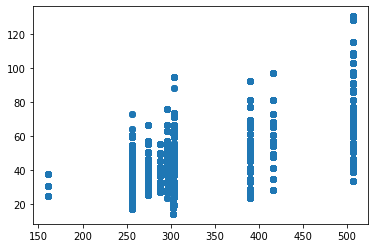

In [9]:
X = df_train[["geodistance"]]
Y = df_train["price"]
plt.scatter(X,Y)
plt.show()

### Линейная регрессия 

Линейная регрессия - простейшая модель, в которой функция предсказания цены будет линейной: $f_{a,b}(x) = ax+b$. Здесь $a$ и $b$ - параметры модели, которые необходимо подобрать.

В качестве функции ошибки возьмём среднеквадратичное отклонение, тогда ошибка

$$
L(a,b) = \sum_i (f_{a,b}(x_i)-y_i)^2 = \sum_i (ax_i+b-y_i)^2
$$

Для нахождения минимума ошибки можно использовать несколько методов:

* Метод наименьших квадратов (точное решение, хорошо для небольшой размерности)
* Метод градиентного спуска (для оптимизации многомерных задач)
* Другие численные методы оптимизации

Мы будем использовать библиотеку Scikit Learn для решения задачи регрессии:

In [12]:
model = sk.linear_model.LinearRegression()
model.fit(X,Y)

model.coef_, model.intercept_

(array([0.15102869]), 2.150784071365237)

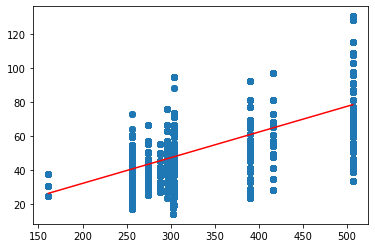

In [14]:
plt.scatter(X,Y)
plt.plot(X,X*model.coef_[0]+model.intercept_, color='r')
plt.show()

Посчитаем ошибку на тестовой выборке. Типовые ошибки для регрессии (здесь за $y$ обозначено целевое значение, $\hat y$ - предсказанное значение):

* Среднеквадратичное отклонение (MSE, Mean Squared Error):

$$
{\mathrm MSE}(y,\hat y) = {1\over n}\sum_{i=1}^N (y_i-\hat y_i)^2
$$

* Средняя ошибка (MAE, Mean Absolute Error):

$$
{\mathrm MAE}(y,\hat y) = {1\over n}\sum_{i=1}^N |y_i-\hat y_i|
$$

* Относительная средняя ошибка (RMAE, Relative Mean Absolute Error) - показывает, в процентах, на сколько мы ошибаемся относительно среднего значения целевой величины $y$:

$$
{\mathrm RMAE}(y,\hat y) = {\sum_{i=1}^N |y_i-\hat y_i| \over \sum_{i=1}^N y_i}
$$

In [17]:
X_t, Y_t = df_test[["geodistance"]], df_test["price"]
Y_p = model.predict(X_t)

def MSE(x,y):
    return np.mean(np.square(x-y)) 

def MAE(x,y):
    return np.mean(np.abs(x-y))

print(f"MSE={np.sqrt(MSE(Y_p,Y_t))}, MAE={MAE(Y_p,Y_t)}, MAE(%)={MAE(Y_p,Y_t)/Y_t.mean()}")

MSE=16.211410019493478, MAE=13.522816511278055, MAE(%)=0.2825811346789957


Итак, мы научились предсказывать стоимость билета с ошибкой в 28%.

Попробуем добавить параметров:

In [19]:
features = ["geodistance","duration","departure_hour"]
X = df_train[features]
X_t = df_test[features]

model = sk.linear_model.LinearRegression()
model.fit(X,Y)

model.coef_, model.intercept_

(array([ 0.17523898, -3.95884765,  0.20209374]), 2.085258631436929)

In [20]:
Y_p = model.predict(X_t)

print(f"MSE={sk.metrics.mean_squared_error(Y_p,Y_t)}, MAE={sk.metrics.mean_absolute_error(Y_p,Y_t)}, MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_p,Y_t)}")

MSE=224.2424391822809, MAE=11.956628081584757, MAE(%)=0.2499405471339483


### Категориальные признаки

Наверное, основной вклад в предсказание цены вносят такие параметры, как класс или используемый тариф:

In [16]:
df["fare"].value_counts()

Promo +       566980
Flexible      422474
Adulto ida    257222
Name: fare, dtype: int64

Построим среднее значение цены в зависимости от тарифа:

<AxesSubplot:xlabel='fare'>

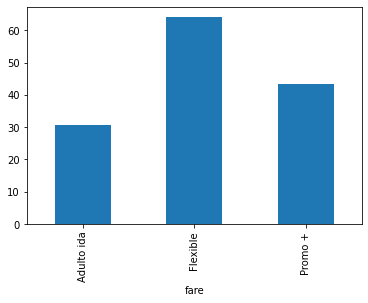

In [17]:
df.groupby('fare').mean()['price'].plot(kind='bar')

Для представления категориальных признаков, можно использовать различные подходы:
* Простой **Label Encoding**, когда каждое уникальное значение заменяется соответствующим численным значением. Этот способ хорошо использовать тогда, когда категориальные значения некоторым образом логически упорядочены, например оценки **удовлетворительно**, **хорошо** и **отлично** можно заменять цифрами 1, 2 и 3 соответственно - это отражает логическую зависимость в данных. Такой подход нельзя применять для неупорядоченных значений, например, цветов - в этом случае мы вносим дополнительные зависимости в данные, которых там не было.
* **One-Hot Encoding**, в котором для каждого значения заводится отдельный столбец из нулей или единиц. Например, для цветов, красный может представляться вектором (1,0,0,0,0,0,0), а зелёный: (0,0,0,1,0,0,0).
* Есть и другие способы кодирования, описанные [в этой заметке](https://habr.com/ru/post/666234/)

В нашем случае, мы можем использовать оба подхода. С учётом построенного выше графика, тарифы можно расположить в порядке возрастания цены: Adulto, Promo+, Flexible - и закодировать соответственно цифрами 0, 1 и 2. Либо использовать one-hot encoding. 

Попробуем использовать one-hot encoding. В `pandas` можно использовать фукнцию `get_dummies`:

In [ ]:
pd.get_dummies(df["fare"])

In [31]:
X = pd.get_dummies(df_train,columns=["fare"])[['geodistance','fare_Adulto ida','fare_Promo +','fare_Flexible']]
X

,geodistance,fare_Adulto ida,fare_Promo +,fare_Flexible
760332,288.173699,0,1,0
304148,303.180694,0,1,0
989303,161.318295,1,0,0
213138,506.741151,0,1,0
808565,303.573264,0,1,0
...,...,...,...,...
98533,303.573264,1,0,0
568223,161.318295,1,0,0
1192106,296.103026,0,1,0
847909,296.103026,0,1,0


In [38]:
*a, b = np.random.normal(size=5)
a = np.array(a)
eta = 0.000005
for i in range(20):
    print(f"Epoch {i}: MSE={MSE(X@a+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((X@a+b-Y)*X.T).mean(axis=1), b-eta*(X@a+b-Y).mean()

Epoch 0: MSE=21202.153278460846
Epoch 1: MSE=5383.890981590381
Epoch 2: MSE=1506.719181624137
Epoch 3: MSE=556.3957703278301
Epoch 4: MSE=323.464249880926
Epoch 5: MSE=266.3707151103097
Epoch 6: MSE=252.37635333322135
Epoch 7: MSE=248.94591326134503
Epoch 8: MSE=248.10476745680597
Epoch 9: MSE=247.89827657058675
Epoch 10: MSE=247.84734423381272
Epoch 11: MSE=247.83454043624639
Epoch 12: MSE=247.83108221982295
Epoch 13: MSE=247.82991467617538
Epoch 14: MSE=247.82930859360152
Epoch 15: MSE=247.82884013187245
Epoch 16: MSE=247.82840540142058
Epoch 17: MSE=247.82797894038916
Epoch 18: MSE=247.82755450891958
Epoch 19: MSE=247.82713057416248


Видим, что точность при использовании дополнительных данных несколько повышается! Это связано с тем, что мы добавляем дополнительную информацию, которая является важной при определении цены билета.

Мы можем посмотреть на коэффициенты при различных тарифах, чтобы сделать выводы о том, как они влияют на цену билета. В этом смысле модель является **интерпретируемой**:

In [ ]:
a

## Scikit Learn

Стандартом де факто для классического машинного обучения является библиотека [Scikit Learn](https://scikit-learn.org/stable/index.html). Реализуем линейную регрессию с помощью этой библиотеки. Для начала, выделим значимые численные и категориальные признаки:

In [40]:
numeric = ['geodistance','duration','departure_hour']
categorical = ['vehicle_type','vehicle_class','fare']

Для обучения линейной регрессии на числовых признаках, используем следующий код:

In [41]:
X = df_train[numeric]
model = sk.linear_model.LinearRegression()
model = model.fit(X,Y)

Основной метод для обучения модели - `fit`. По-английски подбор параметров модели называется *fitting the model*, поскольку мы подбираем такие значения параметров, которые минимизируют ошибку.

Вычислим точность на тестовой выборке:

In [42]:
X_t = df_test[numeric]
Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=224.06147183738943, MAE=11.955942874423892, MAE(%)=0.28813535668551027


Можем посмотреть коэффициенты модели:

In [43]:
print(f"Coefficients={model.coef_}, bias={model.intercept_}")

Coefficients=[ 0.17559789 -3.96937366  0.2006598 ], bias=2.0331908705938346


Для кодирования признаков, также можно использовать механизм Scikit Learn. Соответствующие объекты называюется **Encoder**. Вот как мы можем использовать энкодеры:

In [44]:
ohe = sk.preprocessing.OneHotEncoder()
ohe.fit(df[["fare","vehicle_class"]])
print(ohe.categories_)
ohe.transform(df[["fare","vehicle_class"]]).toarray()[:10]

[array(['Adulto ida', 'Flexible', 'Promo +'], dtype=object), array(['Turista', 'Turista Plus', 'Turista con enlace'], dtype=object)]


array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.]])

Для того, чтобы применить различные энкодеры к различным полям, существует удобный механизм трансформеров. Например, получим таблицу с нужными нам полями, описав преобразователи для всех категориальных полей:

In [45]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.OneHotEncoder(),['fare']),
    (sk.preprocessing.OneHotEncoder(),['vehicle_type']),
    (sk.preprocessing.OneHotEncoder(),['vehicle_class']),
    remainder='passthrough'
)
X = transformer.fit_transform(df_train[numeric+categorical])
X.toarray()[:2]

array([[  0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        , 288.17369877,   1.95      ,   8.        ],
       [  0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        , 303.1806944 ,   2.67      ,  16.        ]])

Полученные значения можно использовать для обучения модели:

In [46]:
model = sk.linear_model.LinearRegression()
model = model.fit(X,Y)
X_t = transformer.transform(df_test[numeric+categorical])
Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=74.93589624336764, MAE=6.0301749486387735, MAE(%)=0.13978526634654137


### Нормализация значений

Для того, чтобы модель не отдавала предпочтение некоторым из признаков, обычно прибегают к масштабированию признаков. Поскольку one-hot encoding даёт нам признаки, находящиеся в диапазоне от 0 до 1, то и остальные признаки имеет смысл приводить к примерно такому же диапазону.

В SkLearn удобно использовать два вида нормализации:
* `MinMaxScaler` - преобразует значения строго к диапазону 0-1, вычитая минимальное значение, и деля на интервал между максимальным и минимальным.
* `StandardScaler` - вычитает из значений среднее и делит на дисперсию

Мы можем встроить нормализацию в наш конвейер предобработки:


In [47]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.StandardScaler(),['geodistance']),
    (sk.preprocessing.StandardScaler(),['duration']),
    (sk.preprocessing.StandardScaler(),['departure_hour']),
    (sk.preprocessing.OneHotEncoder(),['fare']),
    (sk.preprocessing.OneHotEncoder(),['vehicle_type']),
    (sk.preprocessing.OneHotEncoder(),['vehicle_class']),
)
X = transformer.fit_transform(df_train[numeric+categorical])
X.toarray()[:2]

array([[-0.13767595, -0.34967819, -1.18776956,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.01339103,  0.09923626,  0.58425159,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ]])

In [48]:
model = sk.linear_model.LinearRegression()
model = model.fit(X,Y)
X_t = transformer.transform(df_test[numeric+categorical])
Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=74.93589624331987, MAE=6.030174948569133, MAE(%)=0.13978526634157806


### Добавление атрибутов

Иногда, результат может зависеть от входных признаков нелинейно. Например, количество оставшихся денег на счете в случае со сложными процентами скорее всего будет зависеть от времени экспоненциально. В этом случае мы можем улучшить точность можели, заменив входное значение его логарифмом.

Аналогичным образом можно пытаться добавлять в исходный датасет различные функции от входных переменных или их комбинаций, которые становятся новыми признаками в линейной модели. Один из подходов, который позволяет отслеживать зависимость результата от комбинаций признаков, является добавление полиномиальных признаков. Например, если исходный датасет включает в себя признаки $x_1, x_2, x_3$, то добавляя все полиномиальные признаки степени 2, получим $x_1^2, x_2^2, x_3^2, x_1x_2, x_1x_3, x_2x_3$, вдобавок к исходным признакам.

Добавление полиномиальных комбинаций признаков можно сделать с помощью трансформера:

In [50]:
poly = sk.preprocessing.PolynomialFeatures()
Xp = poly.fit_transform(X)
X.shape,Xp.shape

((997340, 24), (997340, 325))

Видим, что из 24 признаков мы получили 325!

Обучаем модель на расширенном наборе признаков:

In [51]:
model.fit(Xp,Y)

Xp_t = poly.transform(X_t)
Yp_t_pred = model.predict(Xp_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Yp_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Yp_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Yp_t_pred)}")

MSE=50.248483365381006, MAE=4.620799269688753, MAE(%)=0.10934997634932649


### Используем пайплайны

В нашем последнем примере мы сначала использовали `ColumnTransformer` чтобы закодировать нечисловые значения, а затем `PolynomialFeatures` для добавления полиномиальных признаков, после чего подавали полученные данные на вход модели `LinearRegression` для обучения.

Мы можем объединить эти шаги в единый **конвейер** (или **пайплайн**), поскольку все элементы этого конвейера имеют единый интерфейс в виде методов `fit` и `fit_transform`:

In [ ]:
pipe = sk.pipeline.Pipeline([
    ('ColumnTransform',transformer),
    ('PolyFeatures',poly),
    ('LinearModel',model)
])
pipe.fit(df_train[numeric+categorical],Y)
pipe.score(df_test[numeric+categorical],Y_t)

Таким образом, с помощью нескольких строчек кода мы построили конвейер предобработки данных, обучили модель, и проверили её метрику качества (accuracy). 

### Деревья решений

В нашем случае понятно, что цены на билеты в зависимости от тарифа могут меняться скачкообразно, т.е. для каждого тарифа могут применяться свои правила ценообразования. Для таких случаев можно использовать другой алгоритм машинного обучения - **деревья решений**. Дерево решений смотрит на некоторый признак, и в зависимости от его значения рассматривает два и более вариантов решений. В каждом из вариантов выбирается другой признак, и так далее.

Попробуем обучить алгоритм дерева решений на наших данных:

In [52]:
model = sk.tree.DecisionTreeRegressor()
model = model.fit(X,Y)

Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=33.43300455891495, MAE=2.8376141309899467, MAE(%)=0.07070084272619383


Как видим, использование деревьев дает нам весьма высокую точность!

Деревья также являются интерпретируемой моделью, однако визуализация большого дерева не слишком наглядна. Для наглядности, ограничим глубину обучаемого дерева - это снизит точность, но позволит нам визуализировать дерево более наглядно: 

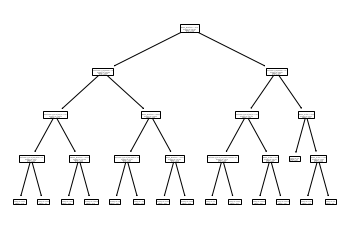

In [32]:
model = sk.tree.DecisionTreeRegressor(max_depth=4)
model = model.fit(X,Y)

z = sk.tree.plot_tree(model,feature_names=transformer.get_feature_names_out())

Для более качественного отображения имеет смысл использовать библиотеку **GraphViz**. Её необходимо установить с помощью `conda install python-graphviz` в ваше окружение.

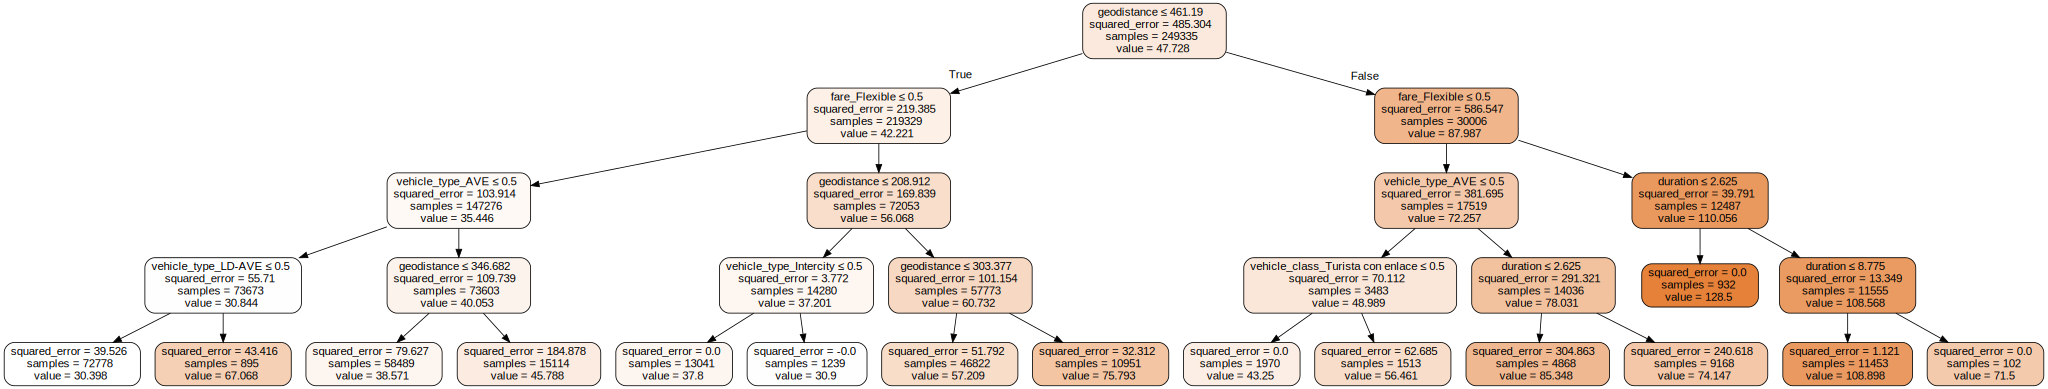

In [33]:
import graphviz
graphviz.backend.dot_command.DOT_BINARY = 'c:/winapp/conda/Library/bin/graphviz/dot.exe'

def proc_feature_name(x):
    return x.replace('onehotencoder-1__','')\
        .replace('onehotencoder-2__','')\
        .replace('onehotencoder-3__','')\
        .replace('remainder__','')

feature_names = [proc_feature_name(x) for x in transformer.get_feature_names_out()]

graphviz.Source(
    sk.tree.export_graphviz(model,feature_names=feature_names,
    filled=True, rounded=True, special_characters=True)
)